In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
import xarray as xr

<xarray.Dataset>
Dimensions:    (lat: 64, lon: 96, time: 1980)
Coordinates:
  * lat        (lat) float64 -89.06 -86.23 -83.4 -80.58 ... 83.4 86.23 89.06
  * lon        (lon) float64 1.25 5.0 8.75 12.5 ... 346.2 350.0 353.8 357.5
  * time       (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
    member_id  object ...
Data variables:
    SST        (time, lat, lon) float32 ...


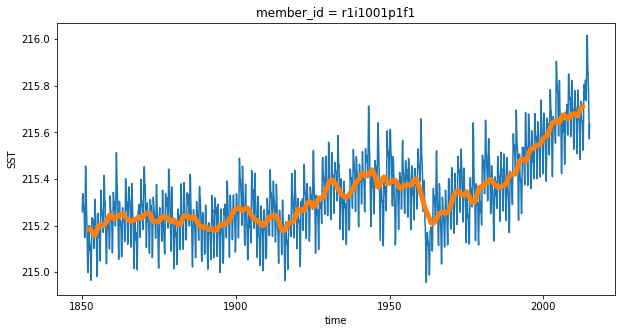

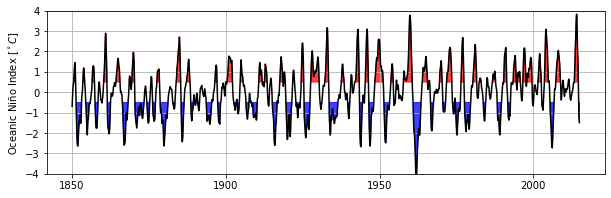

In [10]:
enso1='~/ENSO_SST/ENSO_Project_SST_r1i1001p1f1.nc'
enso1 = xr.open_dataset(enso1)  #xarray can open different format data, netcdf is one of them
print(enso1)                                

sst_1 = enso1['SST'].values; df_sst_1 = enso1.to_dataframe()

weights = np.cos(np.deg2rad(enso1.lat)); weights.name = "weights" # area of the cell scales as dlat*dlon*cos(lat) and we can use it to compute weighted averages; note, dlat=dlon for this dataset.
SST_mean = enso1['SST'].weighted(weights).mean(dim=['lat','lon']) # this IS area-weighted mean
SST_mean_runningMean=SST_mean.rolling(time=12*5,center=True).mean() # global mean smoothed over many months

plt.figure(figsize=(10,5))
SST_mean.plot(label="SST" )
SST_mean_runningMean.plot(label="SST rolling mean", linewidth=5 );

enso1_clim=enso1.groupby("time.month").mean('time') # calculate anomalies
enso1_a = enso1.groupby("time.month")-enso1_clim

NINO34 = enso1_a['SST'].sel(lat=slice(-5,5), lon=slice(190,240)).mean(dim=['lat','lon'])
ONI= NINO34.rolling(time=3,center=True).mean() #rolling mean over 3 months

plt.figure(figsize=(10,3))
ax=plt.gca()
plt.plot(ONI.time, ONI,'k')
ax.fill_between(ONI.time.data, 0.5, ONI, ONI> 0.5, color='red', alpha=.75)
ax.fill_between(ONI.time.data, -0.5, ONI, ONI< -0.5, color='blue',  alpha=.75)
plt.ylim((-4,4))
plt.grid(visible=True)
plt.ylabel('Oceanic Niño Index [$^\circ C$]');

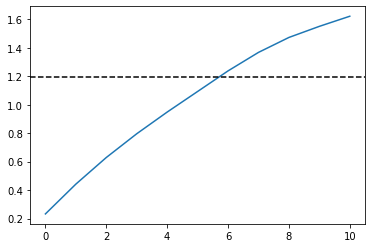

In [12]:
error = np.zeros((300,12))
for i in range(300):
    i0= random.randint(0,len(ONI)-13)
    error[i,:] = (ONI[i0+1:i0+13] - ONI[i0].values*np.ones(12))**2
rms_persistence = (np.mean(error, axis=0))**0.5
plt.plot(rms_persistence)
plt.axhline(np.std(ONI), color='k', linestyle='--')